In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv("data/aug_train.csv")
test_data = pd.read_csv("data/aug_test.csv")
print(train_data.shape, test_data.shape)

(19158, 14) (2129, 13)


In [3]:
train_data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
test_data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

(array([7262., 5169., 2897., 1564., 1066.,  398.,  314.,  166.,  133.,
         189.]),
 array([  1. ,  34.5,  68. , 101.5, 135. , 168.5, 202. , 235.5, 269. ,
        302.5, 336. ]),
 <BarContainer object of 10 artists>)

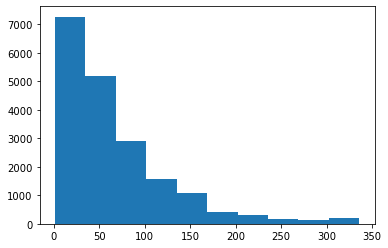

In [6]:
plt.hist(train_data['training_hours'])

(array([14381.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

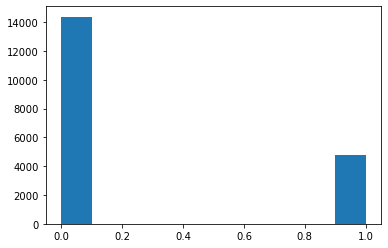

In [7]:
plt.hist(train_data['target'])

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Data preprocessing

In [ ]:
train_data['company_size'].value_counts()

In [ ]:
train_data.columns

In [ ]:
def data_preprocess(data):
    # drop unnecessary column
    data.drop(['enrollee_id'], axis = 1, inplace = True)
    
    # deal with city
    tmp = data['city'].str.split('_')
    data['city'] = tmp.apply(lambda x: x[1])
    
    # fill nan & transform categorical features to numerical 
    data['gender'] = data['gender'].fillna(0).map({0: 0, 'Male': 1, 'Female': 2, 'Other': 3})
    data['relevent_experience'] = data['relevent_experience'].map({'Has relevent experience': 0, 'No relevent experience': 1})
    data['enrolled_university'] = data['enrolled_university'].fillna(0).map({0: 0, 'no_enrollment': 1, 
                                                                             'Full time course': 2, 'Part time course': 3})
    data['education_level'] = data['education_level'].fillna(0).map({0: 0, 'Graduate': 1, 'Masters': 2, 'High School': 3,
                                                                    'Phd': 4, 'Primary School': 5})
    data['major_discipline'] = data['major_discipline'].fillna(0).map({0: 0, 'STEM': 1, 'Humanities': 2, 'Other': 3,
                                                                    'Business Degree': 4, 'Arts': 5, 'No Major': 6})
    data['experience'] = data['experience'].fillna(-1).replace(['<1', '>20'], ['0', '21']).astype('int64')
    data['company_type'] = data['company_type'].fillna(0).map({0: 0, 'Pvt Ltd': 1, 'Funded Startup': 2, 'Public Sector': 3,
                                                                    'Early Stage Startup': 4, 'NGO': 5, 'Other': 6})
    data['company_size'] = data['company_size'].fillna(0).map({0: 0, '50-99': 1, '100-500': 2, '10000+': 3,'10/49': 4,
                                                               '1000-4999': 5, '<10': 6, '500-999': 7, '5000-9999': 8})
    data['last_new_job'] = data['last_new_job'].fillna(-1).replace(['never', '>4'], ['0', '5']).astype('int64')
    data['training_hours'] = pd.cut(data['training_hours'], [0,50,100,150,200,250,300,350], labels = [1,2,3,4,5,6,7]).astype('int64')
    
    return data

In [ ]:
train_data = data_preprocess(train_data)
train_data.isnull().sum()

In [ ]:
'''
def feature_importances(df, model):
    feature_importances = pd.DataFrame(columns = ['feature', 'importance'])
    feature_importances['feature'] = df.columns
    feature_importances['importance'] = model.feature_importances_
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    # print(feature_importances)
    return feature_importances

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

# roc_curve
plot_roc_curve(xgbc, X_val, y_val)

# feature importances
feature_impor = feature_importances(train_data.drop(['target'], axis = 1), xgbc)

plt.figure(figsize=(12, 6))
sns.barplot(x="importance", y="feature", data=feature_impor)
plt.title('XGboost features importance')

# plot decision trees
create_feature_map(train_data.columns)

fig, ax = plt.subplots()
fig.set_size_inches(100, 100)
xgb.plot_tree(xgbc, ax = ax, num_trees=0, fmap='xgb.fmap')
'''

## optuna

In [ ]:
def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)
    return (x + y) ** 2
 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
 
print(study.best_params)
print(study.best_value)

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(study)

In [ ]:
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [20, 40, 60, 80, 100, 120, 140, 160]),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17, 20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48, 2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    
    model = lgbm.LGBMClassifier(**param)
    model.fit(X_train, y_train)
    pred_val = xgbc.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, pred_val)
    return auc_val

In [ ]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [ ]:
# optuna.visualization.matplotlib.plot_optimization_history(study)

In [ ]:
# optuna.visualization.matplotlib.plot_optimization_history(study)
'''
optuna.visualization.plot_parallel_coordinate(study).show()
optuna.visualization.plot_slice(study).show()
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample']).show()
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study).show()
#Visualize empirical distribution function
optuna.visualization.plot_edf(study).show()
'''
